<p>
<b><font size="6" face="Verdana">Regressão Linear - Boston Housing Dataset</font></p></b>
<img src = "https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2018/05/boston-rent-social.jpg">

<font size="3" face="Verdana">A regressão linear apesar de um modelo relativamente simples, se comparado a outros, tem um grande poder de predição e é solução para diversos problemas comuns. Dessa forma vale a pena ver alguns conceitos importantes que não devem ser entendido.</font></p>

<p>
<b><font size="4" face="Verdana">REGRESSÃO LINEAR</b><br>
<font size="3" face="Verdana">A regressão linear pode ser definida pela estatística como uma equação que busca estimar o(s) valor(es) de y, dados uma ou mais variáveis x. Assim y é a variável dependente de x, a é o coeficiente linear e b é o coeficiente angular. Sendo definido pela equação matemática:</font></p>

<img src = "https://static.packt-cdn.com/products/9781789537123/graphics/78c4af48-3b33-4cbd-bc15-45aeb0f8833e.png" height="30" width="200">


<p>
<font size="3" face="Verdana">Apesar do nome, a regressão linear também lida com relações não lineares.
Em problemas de regressão, as variáveis independentes podem ser numéricas ou categóricas, enquanto a variável explicada (dependente) é sempre numérica. Na teoria, a equação da regressão linear, iremos observar o gráfico abaixo. Logo, a variável <b>a</b> que vai definir o deslocamento da reta e a variável <b>b</b> que vai definir a inclinação da reta.</font></p>

<img src = "https://i0.wp.com/dadosaocubo.com/wp-content/uploads/2020/07/image2-3.png" height="300" width="300">

<p><font size=3 face="verdana">Alem disso, temos um exemplo onde a variável y é dependente de apenas uma variável x, mas nos problemas do mundo real, normalmente o que temos é a variável y dependente de várias variáveis x. Portanto temos a fórmula abaixo que representa mais de uma variável independente. </font></p>

<img src = "https://i0.wp.com/dadosaocubo.com/wp-content/uploads/2020/07/image8-1.png" height = "50" width="600">


<p><font size=3 face="verdana">Ou seja vamos ter o número p de variáveis x, onde i denota a i-ésima observação do conjunto de treino. Mas não vamos nos preocupar com o tamanho da conta que o algoritmo vai fazer, para nós o importante agora é entender o conceito por trás da fórmula. Portanto, entendido o conceito vamos a um exemplo prático. </font></p>

<p>
<b><font size="4" face="Verdana"> BOSTON HOUSING DATASET</font></p></b>

<p><font size=3 face = "verdana">A partir desses conceitos, aqui a idéia é implementar um modelo de Regressão Linear um conjunto de dado de habitação que contém informações sobre diferentes casas em Boston. Vamos realizar a Regressão Linear no conjunto de dados de habitação de Boston que está presente dentro do pacote scikit learn.</font></p>
    

In [52]:
# Instalando todos as bibliotecas necessárias para a nossa análise

import numpy as np # para algebra linear
import pandas as pd # processamento de dados, arquivos CSV I/O (expl: pd.read_csv)
import seaborn as sns #biblioteca de visualização
import matplotlib.pyplot as plt #biblioteca de visualização
%matplotlib inline
import sklearn

In [53]:
from sklearn.datasets import load_boston
boston=load_boston()
boston.keys()

/home/oserxavier/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

<p><font size=4 face = "verdana">Depois de importar o conjunto de dados, imprimimos os nomes dos campos do conjunto de dados usando a função keys(). Aqui, data contém as informações ou dados de diferentes casas, target contém os preços da casa , feature_names contém os nomes do recurso ou coluna dos dados e DESCR descreve o conjunto de dados.</font></p>

<p>
<ol type="1">
<font size="4" face="Verdana">
<li>CRIM    - taxa de criminalidade per capita por cidade</li>
<li>ZN      - Proporção ZN de terrenos residenciais zoneados para lotes acima de 25.000 sq.ft.</li>
<li>INDUS   - Proporção INDUS de acres de negócios não varejistas por cidade</li>
<li>CHAS    - Variável dummy CHAS Charles River (= 1 se o trato limita o rio; 0 caso contrário)</li>
<li>NOX     - Concentração de óxidos nítricos NOX (partes por 10 milhões)</li>
<li>RM      - número médio de quartos por habitação</li>
<li>AGE     - Proporção AGE de unidades ocupadas pelo proprietário construídas antes de 1940</li>
<li>DIS     - Distâncias ponderadas DIS para cinco centros de emprego de Boston</li>
<li>RAD     - Índice RAD de acessibilidade às rodovias radiais</li>
<li>TAX     - IMPOSTO sobre o valor total do imposto sobre a propriedade por US$ 10.000</li>
<li>PTRATIO - Relação aluno-professor do PTRATIO por cidade</li>
<li>B       - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade</li>
<li>LSTAT   - % menor status da população</li>
</ol>


In [54]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<p><font size = 4 face ='verdana'>O próximo passo é chamar o método <b>pd.DataFrame()</b> e passar o <b>boston.data</b>, para transformar em <b>Dataframe</b>. E podemos verificar os primeiros 5 dados com <b>df.head()</b>.</font></p>

In [55]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [56]:
# Esses são os nomes dos campos do dataset boston que foi carregado
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [57]:
# Nessa opção, estou atribuindo os nomes dos campos ao nosso dataframe
df.columns = boston.feature_names

In [58]:
# Listando, dessa forma teremos os nomes de cada coluna no nosso dataframe
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
# Juntamos ao DataFrame o target(y), nossa saida
df['PRICE'] = target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


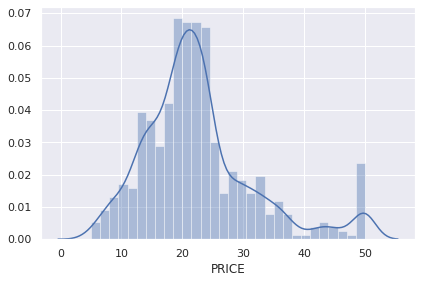

In [60]:
# Para entender a relação entre a variável "TARGET" e as características vamos traçar a distribuição da variável alvo PREÇO. 
# Usaremos a função displot da biblioteca seaborn e então criaremos uma matriz de correlação. 
# Usaremos a função heap para plotá-lo usando a biblioteca seaborn.
sns.set(rc={'figure.figsize':(6.7,4.27)})
sns.distplot(df['PRICE'], bins=30)
plt.show()

<p><font size = 4 >Abaixo vamos utilizar o <b>describe()</b> para listar as variáveis e mostrar alguns dados estatísticos básicos como (mínimo, máximo, média, e outros) não deixe de conferir o post sobre estatística para saber mais sobre esses dados (Estatística Descritiva Univariada).</font></p>

In [62]:
# Abaixo utilizei o .T que faz a transposição dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [64]:
# Utilizando o método .info() para trazer mais informações sobre nossas variáveis
# Podemos perceber que não temos dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<p><font size = 4 face = 'verdana'>Modelo LinearRegression
Vamos começar selecionando nossas features e target, entradas e saídas ou simplesmente X e y são nomes comuns que podem aparecer na literatura. <br>Para ficar mais didático vamos selecionar apenas uma variável de entrada.</font></p>

In [65]:
X = df[['LSTAT']]
y = df.PRICE